<a href="https://colab.research.google.com/github/Shin-GC/Study_for_ML/blob/main/%EC%83%9D%EC%84%A0_%EB%AC%B4%EA%B2%8C_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 사이킷런에서 사용할 훈련 세트는 2차원 배열이여야 하는데 가지고 있는 배열이 1차원배열이기 때문에 2차원 배열로 모양을 바꿔준다.
train_input = train_input.reshape(-1, 1) #크기가 -1 일시 나머지 원소개수로 모두 채운다. [즉 최대 원소 크기]
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() #객체 생성

knr.fit(train_input, train_target) #훈련

knr.score(test_input, test_target) #점수

from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input) #예측 값
print(f"test_input :\n{test_input}")
print(f"test_prediction :\n{test_prediction}")
print('----------------------------------------------')
print(f"테스트 세트 결정계수 값 : {knr.score(test_input, test_target)}")
#테스트 세트에 대한 평균 절댓값 오차를 계산한다.
print(f'훈련 세트 결정계수 값 : {knr.score(train_input, train_target)}')
mae = mean_absolute_error(test_target, test_prediction)
print(f"테스트 세트에 대한 평균 절댓값 오차:{mae}g")


knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(f'훈련 세트의  결정계수 값 : {knr.score(train_input, train_target)}')
print(f'테스트 세트의 결정계수 값 : {knr.score(test_input, test_target)}')

과대적합 [Overfitting]
: 모델의 훈련 세트 점수가 테스트 세트 점수보다 훨씬 높은 경우를 의미

-> 훈련세트에만 잘 맞는 모델이라 나중에 실전 투입 시 새로운 삼플에 대한 예측이 잘 동작하지 않는 문제 발생

---
과소적합 [Underfitting]
: 모델의 훈련 세트와 테스트 세트 점수가 모두 동일하게 낮거나 테스트 세트 성능의 오히려 더 높은 경우를 의미한다.

-> 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우로 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다.

---
즉 현재 모델은 훈련세트에 대한 값이 테스트세트보다 낮은 경우 이므로 과소적합 모델 [Underfitting Model] 이다.

해결방안 : 모델을 조금 더 복잡하게 만들기 즉 K-최근접 이웃 알고리즘에서는 이웃의 개수 k를 줄이면 된다.

####회귀 [ Regression ] 에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하기 때문에 
####정확도를 결정계수 [ Cofficient of determination ] 이라고 부르며 간단히 $R^2$ 라고 부른다.
---

$$결정 계수를 계산하는 방식 = 1-\frac {(타깃-예측)^2의합}{(타깃-평균)^2의 합}$$

---
타깃이 평균정도를 예측하는 수준이라면 $R^2$은 0에 가까워지고, 예측이 타깃에 아주 가까워지면 1에 가까운 값이 된다.


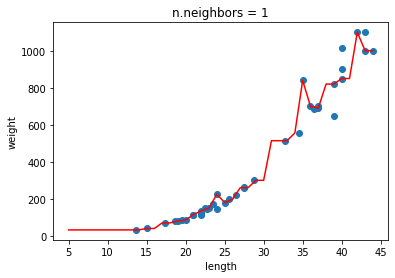

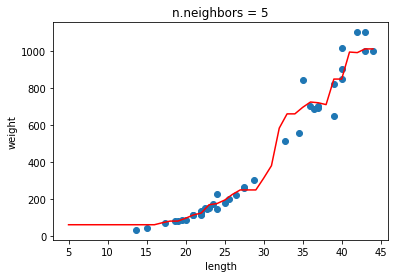

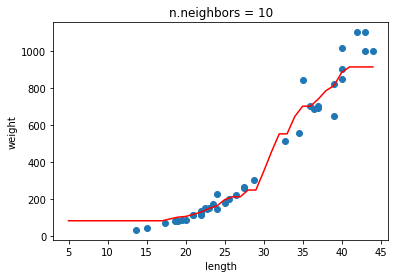

In [ ]:
# 연습 문제
# 이웃의 개수를 1, 5, 10 으로 각각 설정했을때 5~45의 값이 들어간 X에 대한 예측 값을 구해보고 표로 확인하기
knr = KNeighborsRegressor()
x= np.arange(5,45).reshape(-1,1)
for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction,c='red')
  plt.title('n.neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()
  # 이웃 수가 작을 수록 폭이 날카롭고 변동이 크며 이웃 수가 클 수록 폭이 원만하며 변동이 작다.